<a href="https://colab.research.google.com/github/Monikacg/Signal-Manipulation/blob/master/gr_work1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Syntetic signal analysis - Group work 1

In [ ]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
from tftb.generators import amgauss, fmlin
from tftb.processing import WignerVilleDistribution

## Create signal

<Figure size 432x288 with 0 Axes>

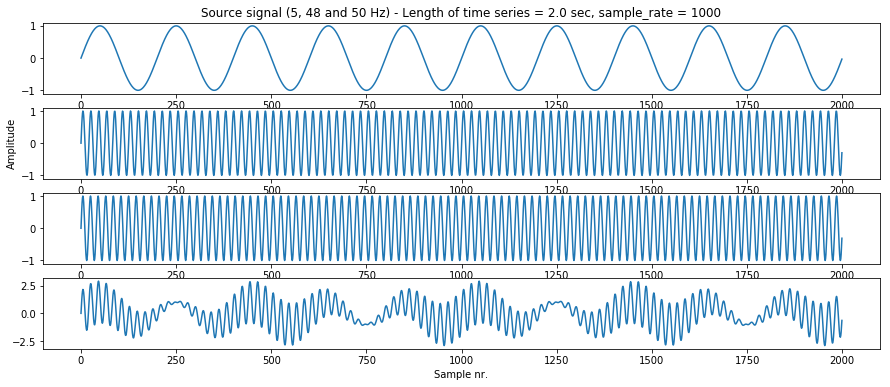

In [ ]:
f_s = 1000 # Sampling rate (measurements/sec)
signal_length = 2

f1 = 5
f2 = 48
f3 = 50

t = np.linspace(0, signal_length, 2*f_s, endpoint = False)

x1 = np.sin(f1* 2 * np.pi*  t)
x2 = np.sin(f2* 2 * np.pi*  t)
x3 = np.sin(f3* 2 * np.pi*  t)

# Compose signal 
x = x1 + x2 + x3

plt.figure(1)
plt.figure(figsize=(15,6))
plt.subplot(411)
plt.plot(x1)
plt.title("Source signal (5, 48 and 50 Hz) - Length of time series = {} sec, sample_rate = {}".format(len(x)/f_s, f_s))

plt.subplot(412)
plt.plot(x2)
plt.ylabel("Amplitude")

plt.subplot(413)
plt.plot(x3)

plt.subplot(414)
plt.plot(x)
plt.xlabel("Sample nr.")
plt.show()


# Create the noisy signal

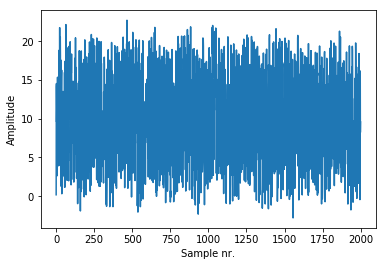

In [ ]:
import numpy as np
import random

sample = 2000
x1 = np.arange(sample)
noise = 0.01*np.asarray(random.sample(range(0,2000),sample))
 
y = x+noise

plt.plot(x1, y)

plt.xlabel("Sample nr.")
plt.ylabel("Amplitude")
plt.show()

# DFT

### no noise

(0, 1100)

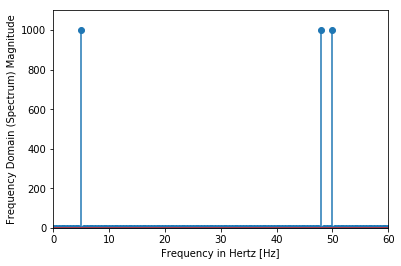

In [ ]:
X = fftpack.fft(x)

freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()
ax.stem(freqs, np.abs(X))

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 60)
ax.set_ylim(0, 1100)

### with noise

(-5, 1200)

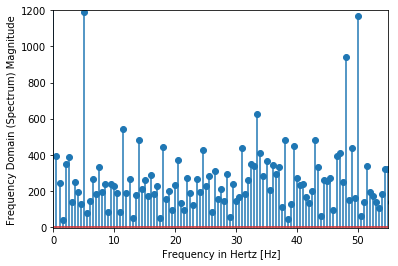

In [ ]:
X = fftpack.fft(y)
freqs = fftpack.fftfreq(len(y)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 55)
ax.set_ylim(-5, 1200)

# Shor time fourier transfrm (STFT)

### No noise

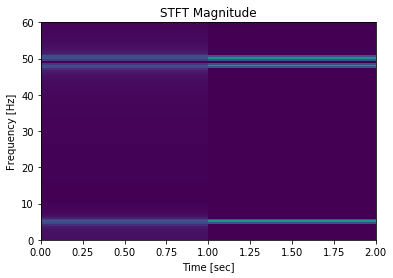

In [ ]:
import scipy
f, t1, Zxx = scipy.signal.stft(x, f_s, nperseg=2000)

plt.pcolormesh(t1, f, np.abs(Zxx), vmin=0, vmax=1)

plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0, 2)
plt.ylim(0, 60)
plt.show()

### With noise 

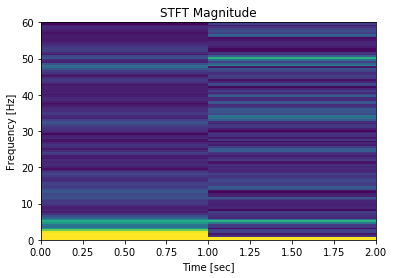

In [ ]:
f, t2, Zxx = scipy.signal.stft(y, f_s, nperseg=2000)

plt.pcolormesh(t2, f, np.abs(Zxx), vmin=0, vmax=1)

plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(0, 2)
plt.ylim(0, 60)
plt.show()

# Hilbert transform (HT)

## fist, compute scipy.signal.hilbert computes the analytic signal

(-200, 150.0)

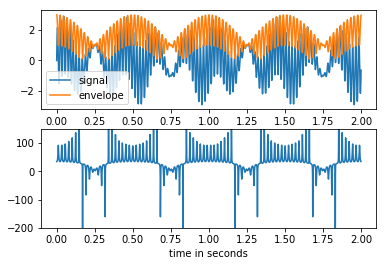

In [ ]:

#scipy.signal.stft

from scipy.fftpack import fft,ifft
from scipy.signal import hilbert, chirp, stft 

signal = x
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)

instantaneous_phase = np.unwrap(np.angle(analytic_signal))

instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * f_s)

fig = plt.figure()

ax0 = fig.add_subplot(211)

ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(-200, 150.0)


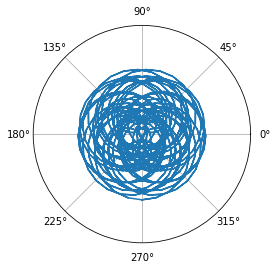

In [ ]:
ax = plt.subplot(111, projection='polar')
ax.plot(instantaneous_phase, amplitude_envelope)
ax.set_rmax(5)
ax.set_rticks([])
ax.grid(True)

## scipy.fftpack.hilbert is just the Hilbert transform. 
If you want the Hilbert transform, not the analytical signal, use scipy.fftpack.hilbert.

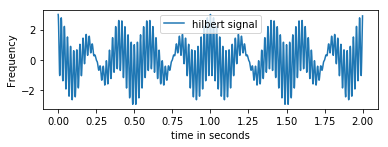

In [ ]:
hilbert_signal = scipy.fftpack.hilbert(x, _cache={})

fig = plt.figure()
ax0 = fig.add_subplot(211)

ax0.plot(t, hilbert_signal, label='hilbert signal')
ax0.set_xlabel("time in seconds")
ax0.set_ylabel("Frequency")
ax0.legend()

In [ ]:
# WVD - same as in Example 1 from lecture

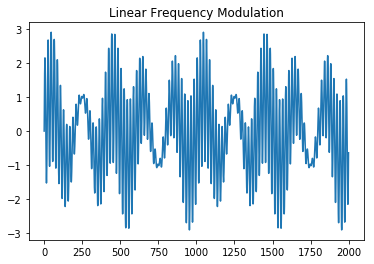

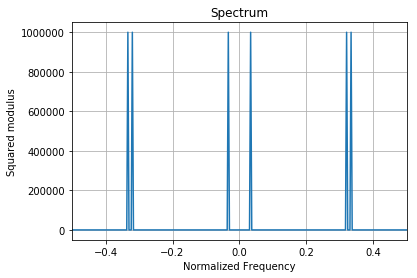

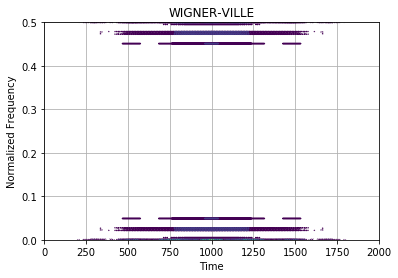

In [ ]:
from tftb.generators import amgauss, fmlin

n_points = 2000
fmin, fmax = 0.0, 1

z = x

plt.plot(np.real(z))
plt.title("Linear Frequency Modulation")
plt.show()


dsp1 = np.fft.fftshift(np.abs(np.fft.fft(z)) ** 2)

plt.plot(np.arange(-1000, 1000, dtype=float) / 300, dsp1)
plt.xlim(-0.5, 0.5)
plt.title('Spectrum')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized Frequency')
plt.grid()
plt.show()

from tftb.processing import WignerVilleDistribution

wvd = WignerVilleDistribution(z)
wvd.run()
wvd.plot(kind='contour', extent=[0, n_points, fmin, fmax])

## Create a new noisy signal

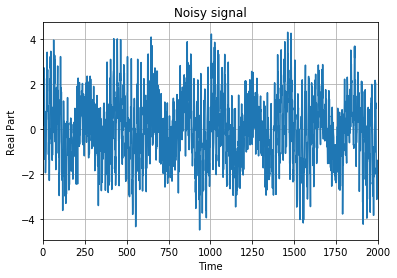

In [ ]:
from tftb.generators import sigmerge, noisecg
noisy_signal = sigmerge(z, noisecg(2000), 0)

plt.plot(np.real(noisy_signal))
plt.xlim(0, 2000)
plt.title('Noisy signal')
plt.ylabel('Real Part')
plt.xlabel('Time')
plt.grid()
plt.show()

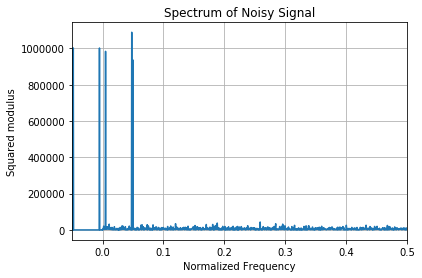

In [ ]:
dsp1 = np.fft.fftshift(np.abs(np.fft.fft(noisy_signal)) ** 2)
plt.plot(np.arange(-1000, 1000, dtype=float) / 2000, dsp1)
plt.xlim(-0.05, 0.5)
plt.title('Spectrum of Noisy Signal')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized Frequency')
plt.grid()
plt.show()

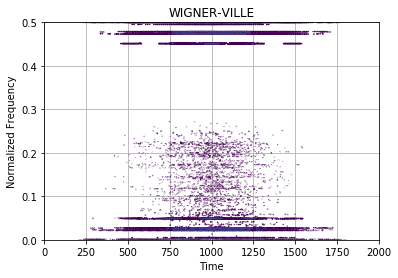

In [ ]:
wvd = WignerVilleDistribution(noisy_signal)
wvd.run()
wvd.plot(kind='contour')

# Spectrogram

C:\Users\saraa\Anaconda3\lib\site-packages\matplotlib\mlab.py:1274: UserWarning: Only one segment is calculated since parameter NFFT (=2048) >= signal length (=2000).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))


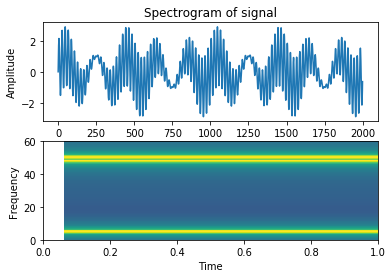

In [ ]:
signalData = x
samplingFrequency= f_s


# Plot the signal read from wav file

plt.subplot(211)

plt.title('Spectrogram of signal')

 
plt.plot(signalData)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.specgram(signalData,Fs=samplingFrequency, NFFT=2**11)

plt.xlabel('Time')
plt.xlim(0, 1)
plt.ylim(0, 60)
plt.ylabel('Frequency')

plt.show()